In [1]:
import pandas as pd
import numpy as np
ser1 = pd.Series(np.arange(4)*10)
ser1

0     0
1    10
2    20
3    30
dtype: int32

In [2]:
ser1[1:3]

1    10
2    20
dtype: int32

In [3]:
import pandas as pd
import numpy as np
index = ['a', 'b', 'c', 'd']
ser2 = pd.Series(np.arange(4)*10, index) # 인덱스 값 주기
ser2

a     0
b    10
c    20
d    30
dtype: int32

In [4]:
ser2['b':'d'] # 라벨 이름으로 슬라이싱 하면 끝자리도 포함한다. !!주의!! 숫자는 끝점에서 자르는거 기억합시다.

b    10
c    20
d    30
dtype: int32

In [5]:
data = np.arange(16).reshape(4,4)
index = ['Ohio', 'Colorado', 'Utah', 'New York']
columns = ['one', 'two', 'three', 'four']
df1 = pd.DataFrame(data, index, columns)
df1

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [6]:
df1.four

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four, dtype: int32

In [7]:
df1[['two', 'four']] # 원하는 칼럼 추출

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [8]:
# df1[['two':'four']] row에서만 가능해!!

In [9]:
df1[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [10]:
df1[df1['three']>5] # 세번째 칼럼이 5 이상인 녀석만 추출

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [11]:
# loc과 iloc로 선택하기
df1.loc['Colorado', ['two', 'three']] # loc는 설정되어 있는 인덱싱으로 추출
                                      # iloc는 기존의 오리지널 행 번호로 추출

two      5
three    6
Name: Colorado, dtype: int32

In [12]:
df1.iloc[1,[1,2]]
                 # loc는 설정되어 있는 인덱싱으로 추출
                 # iloc는 기존의 오리지널 행 번호로 추출

two      5
three    6
Name: Colorado, dtype: int32

In [13]:
df1.loc[['Colorado','Utah'], ['two', 'three']] # 여러 행 , 칼럼 추출 가능

,two,three
Colorado,5,6
Utah,9,10


In [14]:
df1.iloc[[1,2], [1,2]] # 여러 행 , 칼럼 추출 가능

,two,three
Colorado,5,6
Utah,9,10


In [15]:
                                                              s1 = pd.Series([7.3, -2.5, 3.4, 1.5], 
               index=['a','c','d','e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], 
               index=['a','c','e','f','g'])
# 양쪽 다 없을 경우엔 그렇다고 하지만 한쪽만 있는 경우에도 NaN 값이 나옴
# 대응 되는 색인이 없는 경우 데이터 값이 NaN이 된다.

In [16]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [17]:
df1= pd.DataFrame(np.arange(12).reshape((3,4)),
                  columns = [ 'a', 'b', 'c', 'd'])
df2= pd.DataFrame(np.arange(20).reshape((4,5)),
                  columns = [ 'a', 'b', 'c', 'd','e'])

df2.loc[1, "b"] = np.nan

print(df1);print(df2)



df1 + df2 # 두 개의 데이터프레임 중 한 개의 데이터 프레임에서만 가지고 있는 데이터는 합쳤을때 nan 이 나옴을 확인 할 수 있다.

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a     b   c   d   e
0   0   1.0   2   3   4
1   5   NaN   7   8   9
2  10  11.0  12  13  14
3  15  16.0  17  18  19


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [18]:
df1.add(df2,fill_value=0) # 위와 같은 값을 출력한다. 대신 옵션 추가 가능
                          # NaN 값에 0을 붙여 기존에 한 쪽에만 있던 데이터를 합칠 수 있게 됨.
                          # 단 한 쪽값만 포함하다 보니 데이터 결과값이 통계적으로 평균값에는 많이 떨어지게 된다.

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [19]:
frame = pd.DataFrame(np.random.randn(4,3),
                     columns = ['b','d','e'],
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.919518,0.536802,1.805323
Ohio,0.366239,-1.035783,-0.065550
Texas,-0.381187,0.775665,-0.814216
Oregon,0.109087,0.720275,-1.425373


In [20]:
np.abs(frame) # abs = 절대값

,b,d,e
Utah,1.919518,0.536802,1.805323
Ohio,0.366239,1.035783,0.065550
Texas,0.381187,0.775665,0.814216
Oregon,0.109087,0.720275,1.425373


In [21]:
# lambda 함수를 따로 만들지 않아도 간단하게 작업 가능 작명 x
# P218
f = lambda x: x.max() - x.min()        # 같은 열에서 색인하는 Series 반환
frame.apply(f)

b    2.285757
d    1.811448
e    3.230696
dtype: float64

In [22]:
frame.apply(lambda x: x.max() - x.min(),
           axis = 'columns')             # 같은 행에서 색인함.

Utah      3.724842
Ohio      1.402022
Texas     1.589881
Oregon    2.145647
dtype: float64

In [23]:
# lanbda와 다른 함수의 접근
def f(x):
    data = [x.min(), x.min()]
    index = ['min','max']
    return pd.Series(data, index) # 함수에서는 리턴을 필수로 한다.

frame.apply(f)

,b,d,e
min,-1.919518,-1.035783,-1.425373
max,-1.919518,-1.035783,-1.425373


In [24]:
format = lambda x: "%.2f" %x # 소숫점아래 둘 째자리만 출력해라
frame.applymap(format)                  

,b,d,e
Utah,-1.92,0.54,1.81
Ohio,0.37,-1.04,-0.07
Texas,-0.38,0.78,-0.81
Oregon,0.11,0.72,-1.43


In [25]:
frame["e"].map(format) # 프레임에서 특정한 칼럼을 뽑고 싶을때 시리즈(1차원)로 출력

Utah       1.81
Ohio      -0.07
Texas     -0.81
Oregon    -1.43
Name: e, dtype: object

In [30]:
# 정렬
s3 = pd.Series([0, 1, 2, 3],
               index = ['d', 'a', 'b', 'c'])
s3.sort_index()                               #  sort_index() 뒤죽박죽인 순서를 인덱스 별로 정렬함.

a    1
b    2
c    3
d    0
dtype: int64

In [33]:
df3 = pd.DataFrame(np.arange(8).reshape(2,4),
                  index = ["three",'one'],
                  columns = ['d','a','b','c'])
df3

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [35]:
df3.sort_index() # 아스키 코드를 보았을때 o 가 t 보다 앞서니깐

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [39]:
df3.sort_index(axis=0)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [41]:
df3.sort_index(axis=1) #column가 정렬됨 대신 row가 엉망이됨.

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [72]:
df4 = df3.sort_index().sort_index(1) # default값 axis = 0 --> row , = 1 --> column
df4

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


In [75]:
df3.sort_index(axis=1, ascending=False) # 역순

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [79]:
s4 = pd.Series([4, 7, -3, 2])
s4.sort_values() # 원소의 순서대로 정렬함을 알수 있음.

2   -3
3    2
0    4
1    7
dtype: int64

In [81]:
# 순위
s5 = pd.Series([7, -5, 7, 4, 2, 0, 4])
s5.rank()                               # 동일한 순위에 "평균 점수"를 매김 7이 2개이므로 6.5점을 준 모습을 볼 수 있음.

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [83]:
s5 = pd.Series([7, -5, 7, 4, 2, 0, 4])
s5.rank(ascending = False, method = 'max')  # 동률이면 평균이 아닌 정수 단위로 처리 "max" / "평균 점수"를 준다는 사실 잊지말기!! 

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [88]:
# 중복 색인
s6 = pd.Series(range(5), index=['kim','kim','lee','lee','park']) # 문제 없이 잘 되는 것을 볼 수 있음.
s6                                                   

kim     0
kim     1
lee     2
lee     3
park    4
dtype: int64

In [91]:
s6.index.is_unique # 인덱스가 중복 되었다를 알 수 있음.

False

In [93]:
s6['kim']

kim    0
kim    1
dtype: int64

In [94]:
############################## P348 시각화(분위기 전환)

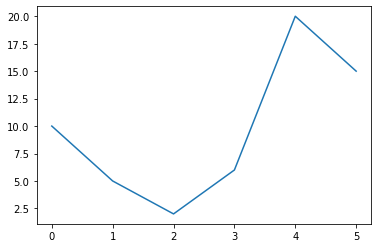

In [97]:
# Plot
import matplotlib.pyplot as plt
data = [10, 5, 2, 6, 20, 15]
plt.plot(data)
plt.show() # 출처 같은 모습의 군더더기를 없애줌.

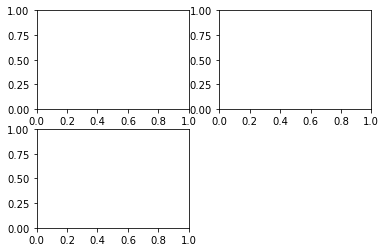

In [103]:
# subPlot
fig = plt.figure() # 그림에 대한 종합정인 정보를 담는 객체
ax1 = fig.add_subplot(2,2, 1)# 2행 2열의 총 네개의 그림중 첫번째
ax2 = fig.add_subplot(2,2, 2)# 2행 2열의 총 네개의 그림중 두번째
ax3 = fig.add_subplot(2,2, 3)# 2행 2열의 총 네개의 그림중 세번째

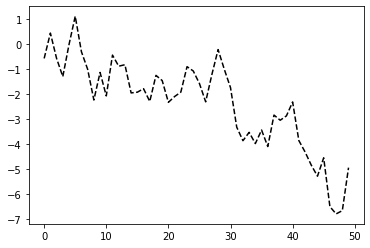

In [104]:
plt.plot(np.random.randn(50).cumsum(), "k--") #변화를 하더라도 약간의 연관성을 주기 위해 cumsum 함수 사용
plt.show()                                    # k 옵션은 검정색, c 파란색, y는 노란색, m은 빨간색
                                              # -- 는 실선

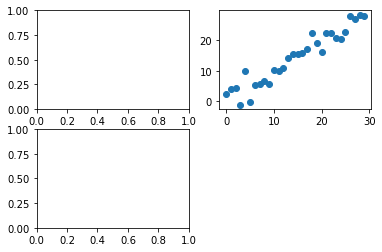

In [106]:
fig = plt.figure() # 그림에 대한 종합정인 정보를 담는 객체
ax1 = fig.add_subplot(2,2, 1)# 2행 2열의 총 네개의 그림중 첫번째
ax2 = fig.add_subplot(2,2, 2)# 2행 2열의 총 네개의 그림중 두번째
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30)) 
ax3 = fig.add_subplot(2,2, 3)# 2행 2열의 총 네개의 그림중 세번째

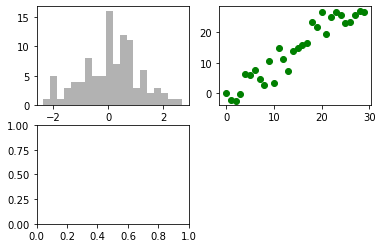

In [113]:
fig = plt.figure() # 그림에 대한 종합정인 정보를 담는 객체
ax1 = fig.add_subplot(2,2, 1)# 2행 2열의 총 네개의 그림중 첫번째
ax1.hist(np.random.randn(100), bins=20, color="k", alpha=0.3)     # 알파는 투명도
ax2 = fig.add_subplot(2,2, 2)# 2행 2열의 총 네개의 그림중 두번째
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30),    
           color = 'g')                                           # 곱하기는 흩어져 있는 정도를 조금 더 심화시킴
ax3 = fig.add_subplot(2,2, 3)# 2행 2열의 총 네개의 그림중 세번째

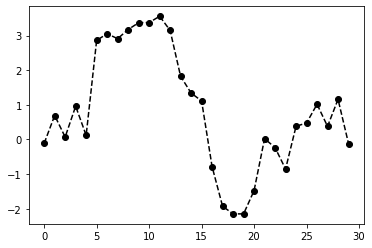

In [116]:
# P355 마커
plt.plot(np.random.randn(30).cumsum(), 'ko--') # 30개 데이터이고 선은 그냥 이어준 것
                                               # "o" 마커 표시

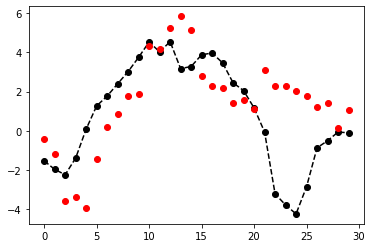

In [118]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')
plt.plot(np.random.randn(30).cumsum(), 'ro')

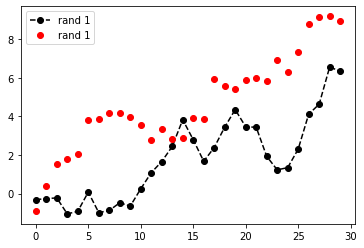

In [123]:
# 범례
plt.plot(np.random.randn(30).cumsum(), 'ko--', label = "rand 1")
plt.plot(np.random.randn(30).cumsum(), 'ro',label = "rand 2")
plt.legend(loc='best') # 가장 적합한 곳에 위치시킴 // 라벨과 레전드를 이용

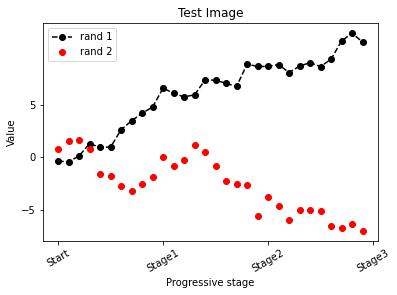

In [134]:
# P358 눈금
fig = plt.figure()                ## 다양한 기능을 넣을려면 1,2번 라인의 코드를 진행해줘야함.
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(30).cumsum(), 'ko--', label = "rand 1")
ax.plot(np.random.randn(30).cumsum(), 'ro',label = "rand 2")
plt.legend(loc='best')
ax.set_xticks([0,10,20,30]) # x축의 단위설정
ax.set_xticklabels(['Start', 'Stage1', 'Stage2','Stage3'], rotation=30) # x 축 단위 이름, 각도 설정
ax.set_xlabel('Progressive stage')            # x 축 이름
ax.set_yticks([-5,0,5])     # y축의 단위설정
ax.set_ylabel('Value')                        # y 축 이름
ax.set_title('Test Image')  # 타이틀 
plt.show()

In [137]:
np.random.randn(30).cumsum()

array([-0.97534802, -1.34154804, -0.97501862, -0.6416146 , -1.97555423,
       -2.05502961, -2.85384738, -1.79910429, -1.38722303, -1.56055062,
       -1.33586837, -1.84986274, -2.82673189, -3.62354454, -4.56295919,
       -4.92615714, -5.37466843, -4.82296301, -5.15948655, -5.55947015,
       -3.56852094, -4.02460307, -4.25014689, -4.25008397, -4.46574032,
       -4.46431199, -3.90635323, -2.21347016, -3.69484992, -4.39721871])

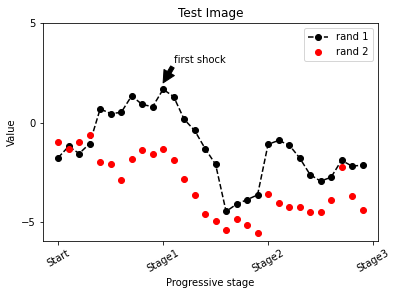

In [143]:
data1 = [-1.75963698, -1.18586232, -1.55013713, -1.05194861,  0.68923548,
        0.46100502,  0.51174413,  1.34605455,  0.91656883,  0.80327398,
        1.6763155 ,  1.3110471 ,  0.17082054, -0.39031549, -1.29833336,
       -2.09624305, -4.45998555, -4.08988131, -3.86583441, -3.62617951,
       -1.08462464, -0.89466174, -1.11606572, -1.76316499, -2.60724717,
       -2.93501582, -2.74242246, -1.89081034, -2.18136705, -2.13547805]
data2 = [-0.97534802, -1.34154804, -0.97501862, -0.6416146 , -1.97555423,
       -2.05502961, -2.85384738, -1.79910429, -1.38722303, -1.56055062,
       -1.33586837, -1.84986274, -2.82673189, -3.62354454, -4.56295919,
       -4.92615714, -5.37466843, -4.82296301, -5.15948655, -5.55947015,
       -3.56852094, -4.02460307, -4.25014689, -4.25008397, -4.46574032,
       -4.46431199, -3.90635323, -2.21347016, -3.69484992, -4.39721871]
fig = plt.figure()               
ax = fig.add_subplot(1, 1, 1)
ax.plot(data1, 'ko--', label = "rand 1")
ax.plot(data2, 'ro',label = "rand 2")
plt.legend(loc='best')
ax.set_xticks([0,10,20,30]) 
ax.set_xticklabels(['Start', 'Stage1', 'Stage2','Stage3'], rotation=30) 
ax.set_xlabel('Progressive stage')           
ax.set_yticks([-5,0,5])     
ax.set_ylabel('Value')                        
ax.set_title('Test Image') 
# ax.text(10, 2, "first shock")  # 원하는 위치에 넣고 싶은 문장 넣기
ax.annotate("first shock", xy=(10, 2),
            xytext= (11,3), arrowprops= dict(facecolor="black"))
plt.show()

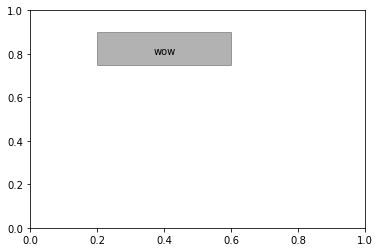

In [152]:
# P363 도형 그리기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75), 0.4, 0.15,  #길이 0.4 높이 0.15
                     color='k', alpha = 0.3)
#cir
#pgon
ax.text(0.37,0.8, "wow")
ax.add_patch(rect)
#ax.add_patch(cir)
#ax.add_patch(pgon) # 다각형

In [ ]:
#